# 离散傅里叶变换

Text(0.5, 1.0, '幅度谱为 1')

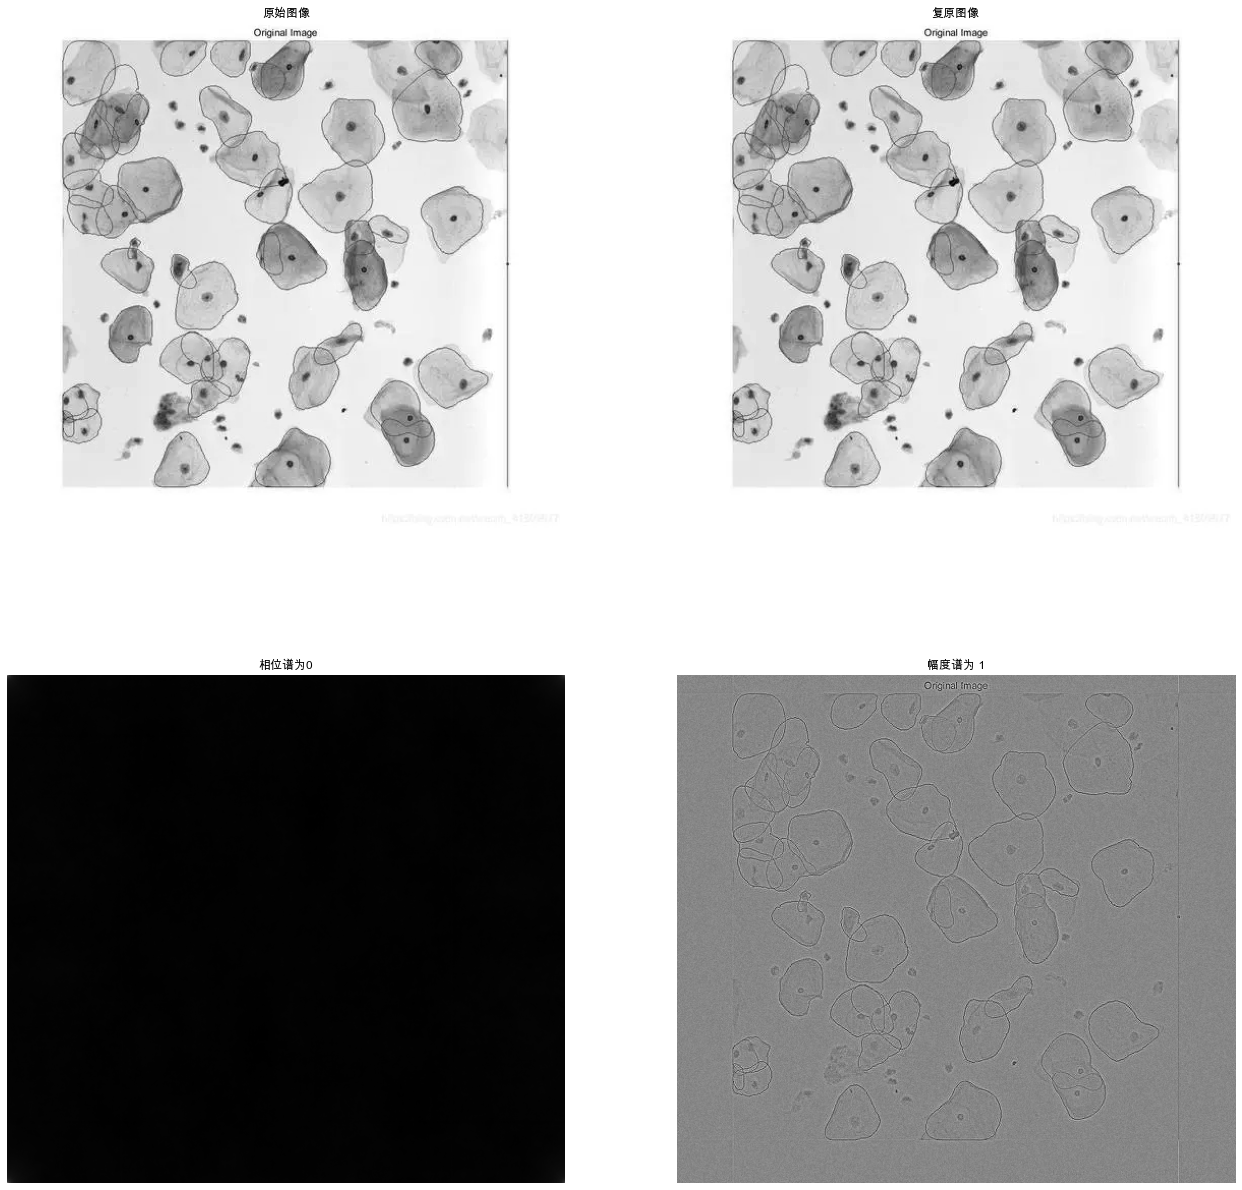

In [1]:
import cv2
import numpy as np
from scipy.fftpack import fft,ifft
import matplotlib.pyplot as plt
import math
from matplotlib.font_manager import FontProperties
fonts = FontProperties(fname = "/Library/Fonts/Arial Unicode.ttf")
plt.rcParams["font.family"] = 'Arial Unicode MS'
plt.rcParams['axes.unicode_minus']=False


img = cv2.imread('img/cells.jpg',0)
# 快速傅里叶变换
img_fft = np.fft.fft2(img)
# 原点移动
img_fft = np.fft.fftshift(img_fft)
# 对数变换
img_fft = np.log(1 + np.abs(img_fft))
# 分离幅度谱和相位谱
dft = np.fft.fft2(img)
dft_shift = np.fft.fftshift(dft)
# 幅度谱
magnitude_spectrum = np.abs(dft_shift)
# 相位谱
phase_spectrum = np.angle(dft_shift)
# 复原
img2 = np.real(np.fft.ifft2(np.abs(dft)*np.exp(1j*(np.angle(dft)))))

plt.figure(figsize=(22, 22))
plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.title('原始图像')
plt.axis('off')

plt.subplot(222)
plt.imshow(img2, cmap='gray')
plt.title('复原图像')
plt.axis('off')

# 相位谱为0
img3 = np.real(np.fft.ifft2(np.abs(dft)))
plt.subplot(223)
plt.imshow(img3, cmap="gray")
plt.axis('off')
plt.title('相位谱为0')
plt.axis('off')
# 幅度谱为A
A = 1
img4 = np.real(np.fft.ifft2(A*np.exp(1j*np.angle(dft))))
plt.subplot(224)
plt.imshow(img4,cmap="gray")
plt.axis('off')
plt.title(f'幅度谱为 {A}')